## Import Required Packages

In [8]:
!pip install keras-tcn -q

In [20]:
import numpy as np
import os
from tcn import TCN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Train / Test Datasets

In [12]:
processed_path = '/content/drive/MyDrive/SLIIT/Y4S1-SE4050-DL/DL-ASSIGNMENT/volati-deep/data/processed'

X_train = np.load(os.path.join(processed_path, 'X_train.npy'))
y_train = np.load(os.path.join(processed_path, 'y_train.npy'))

X_test = np.load(os.path.join(processed_path, 'X_test.npy'))
y_test = np.load(os.path.join(processed_path, 'y_test.npy'))

X_val = np.load(os.path.join(processed_path, 'X_val.npy'))
y_val = np.load(os.path.join(processed_path, 'y_val.npy'))



## Defining Architecture

In [15]:
# Define the model
model = Sequential([
    TCN(
        input_shape=(60,9),    # (timesteps, features)
        nb_filters=64,         # Number of convolutional filters
        kernel_size=3,         # Size of the convolution window
        dilations=[1, 2, 4, 8],# Controls how far back the model can "see"
        return_sequences=False # We only need one output for the whole sequence
    ),
    Dense(units=9)
])

model.summary()

/usr/local/lib/python3.12/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn_1 (TCN)                     │ (None, 64)             │        88,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,481 (349.54 KB)

 Trainable params: 89,481 (349.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 1.6027e-04 - val_loss: 2.1238e-04
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 1.6779e-04 - val_loss: 1.2852e-04
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 1.6766e-04 - val_loss: 1.0847e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 1.5285e-04 - val_loss: 1.0594e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 1.6354e-04 - val_loss: 1.0224e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 1.5998e-04 - val_loss: 1.0435e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 1.6274e-04 - val_loss: 1.0409e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 1.6856e-04 - val_loss: 1.0609e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 1.5290e-04 - val_loss: 1.0179e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 1.5919e-04 - val_loss: 1.0179e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 

## Plots

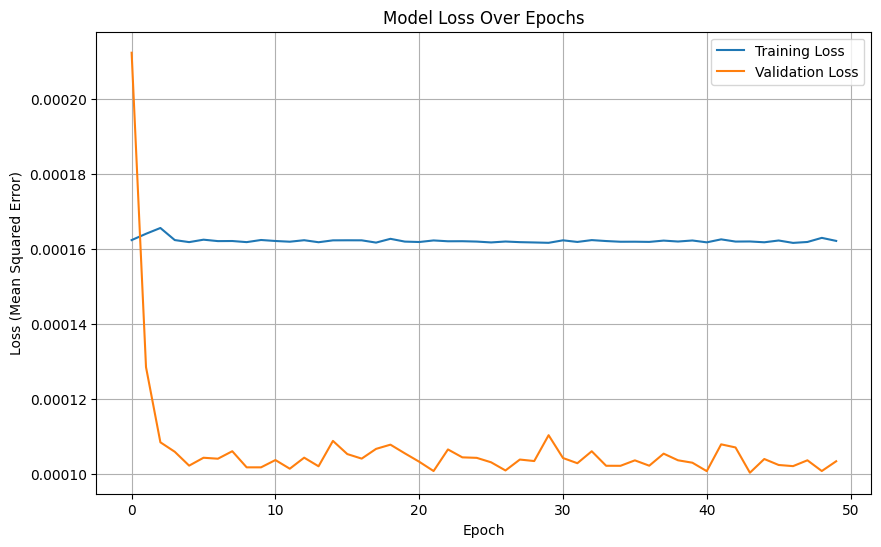

In [21]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

## Evaluating the Test Set


In [26]:
# Evaluate the model on the test set
test_mse = model.evaluate(X_test, y_test)
print(f"Final Test MSE: {test_mse:.4f}")

# Calculate the RMSE
test_rmse = np.sqrt(test_mse)
print(f"Final Test RMSE: {test_rmse:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1991e-04
Final Test MSE: 0.0002
Final Test RMSE: 0.0126
